In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("PIMA.csv")


In [3]:
data.shape

(768, 10)

In [4]:
# check if any null value is present

data.isnull().values.any()


False

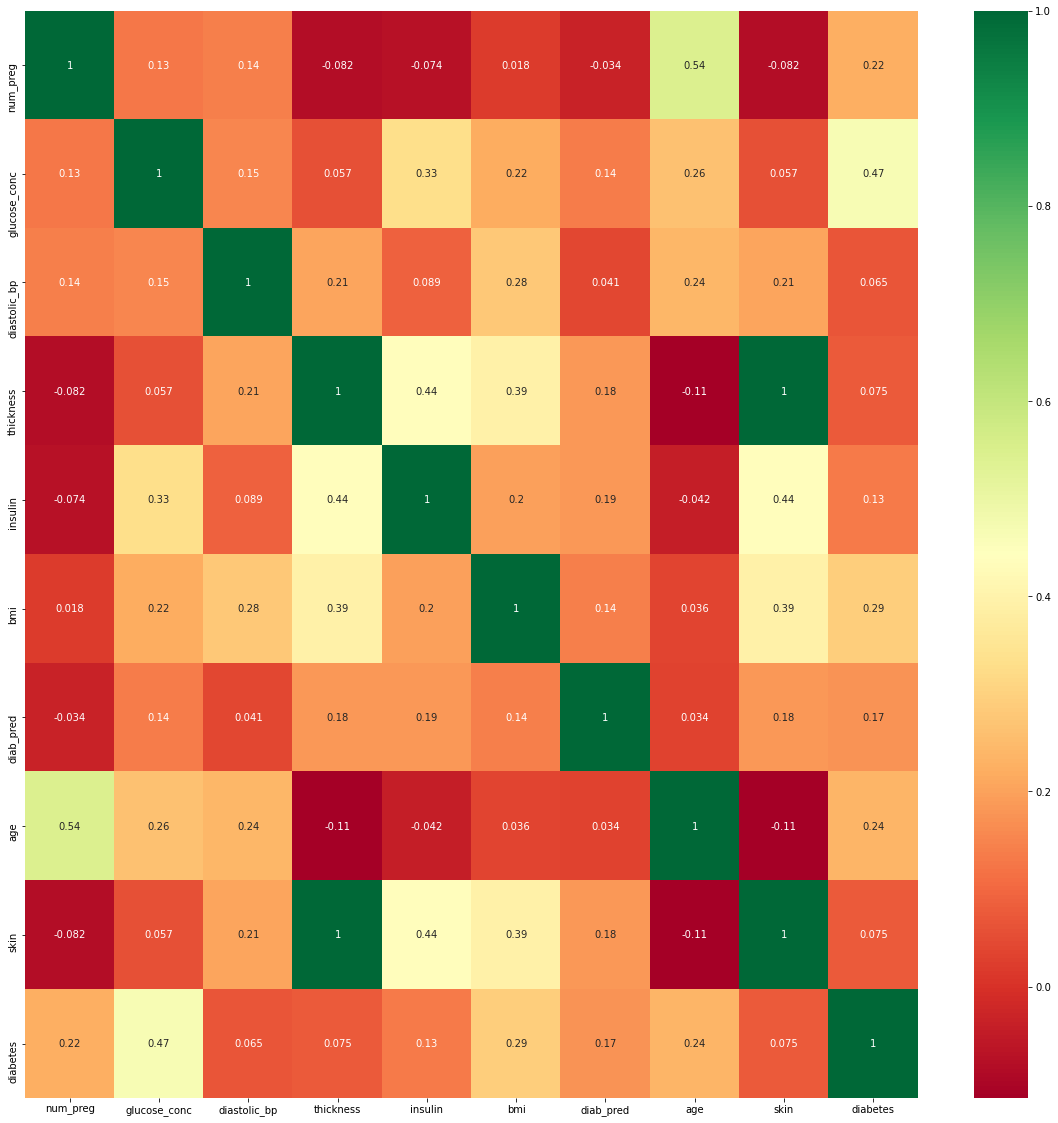

In [6]:
#get correlations of each features in dataset

plt.figure(figsize=(20,20))

sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [7]:
# Changing the diabetes column data from boolean to number
data['diabetes'] = data['diabetes'].map({True: 1, False: 0})


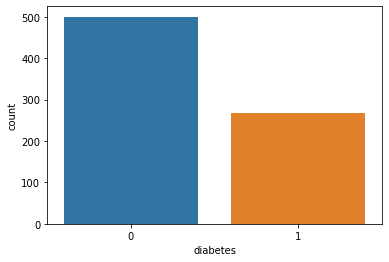

In [14]:
# Count plot for diabetetes
sns.countplot(x='diabetes',data=data)

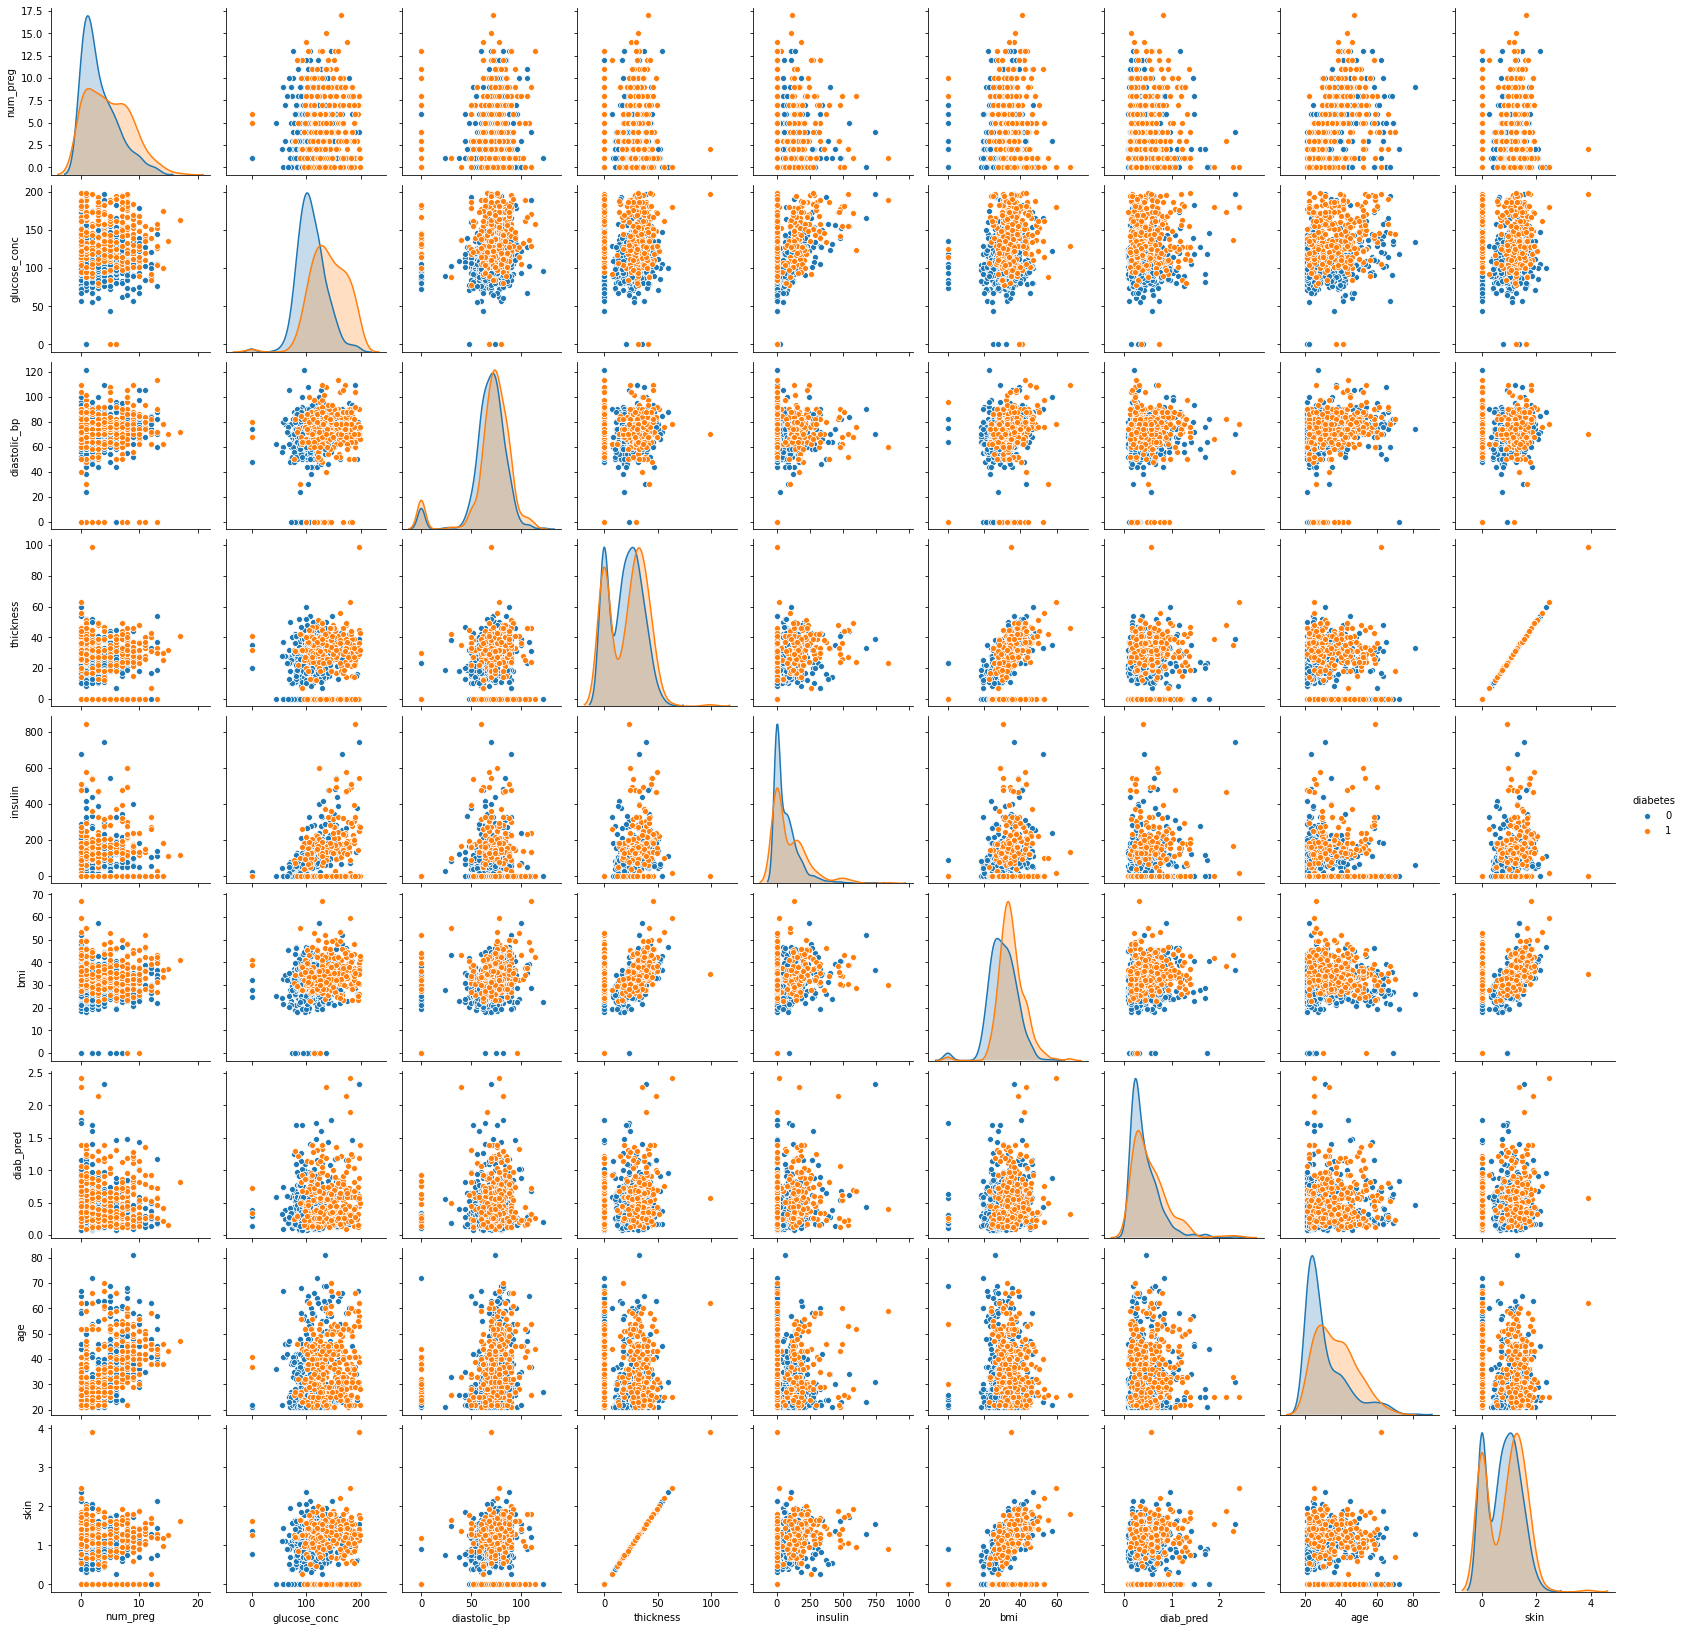

In [17]:
sns.pairplot(data,hue='diabetes')

In [20]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['diabetes'],axis=1)
y=data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


In [29]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [38]:
# Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


In [41]:
class Hyperparameter:
    def __init__(self,f,X_train,Y_train,X_test,Y_test,n):

        self.n=n
        self.f=f
        self.X_train=X_train
        self.Y_train=Y_train
        self.X_test=X_test
        self.Y_test=Y_test
        d=[xgb.XGBClassifier(),LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42,probability=True),DecisionTreeClassifier(random_state=42),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),RandomForestClassifier(random_state=42)]
   
        


        self.grid=GridSearchCV(d[self.n],self.f, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)
        self.grid.fit(self.X_train,self.Y_train)

        
    def best(self):
        re=[]
        re.append(accuracy_score(self.Y_train,self.grid.predict(self.X_train)))
        re.append(accuracy_score(self.Y_test,self.grid.predict(self.X_test)))
        return re
    
class Stage:
    def __init__(self,X_train,Y_train,X_test,Y_test):
        self.X_train=X_train
        self.Y_train=Y_train
        self.X_test=X_test
        self.Y_test=Y_test
        
        self.re_df=pd.DataFrame(columns=["Name","Train Accuracy","Test Accuracy"])
        
    
        
    def Xgbo(self):
        xg_class = xgb.XGBClassifier() #importing the classifier from the library
        xg_class.fit(self.X_train,self.Y_train)
#         
        
        parameters = {
     "eta"    : [0.05, 0.10, 0.15] ,
     "max_depth"        : list(range(3,7)),
     "min_child_weight" : list(range(1,7,2)),
     "gamma"            : [ 0.0, 0.1, 0.2],
     "colsample_bytree" : [ 0.3, 0.4, 0.5]
     }
        
        vv=Hyperparameter(parameters,self.X_train,self.Y_train,self.X_test,self.Y_test,0)
        dfg=vv.best()
        
        self.re_df=self.re_df.append({"Name":"XGBoost","Train Accuracy":dfg[0],"Test Accuracy":dfg[1]},ignore_index=True)
    def logit(self):

        logiit=LogisticRegression().fit(self.X_train,self.Y_train)
        parameters = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

        vv=Hyperparameter(parameters,self.X_train,self.Y_train,self.X_test,self.Y_test,1)
        dfg=vv.best()


        self.re_df=self.re_df.append({"Name":"Logistic Regression","Train Accuracy":dfg[0],"Test Accuracy":dfg[1]},ignore_index=True)

    def KNN(self):

        knn=KNeighborsClassifier().fit(self.X_train,self.Y_train)
        parameters={"n_neighbors":list(range(1,31))}
        vv=Hyperparameter(parameters,self.X_train,self.Y_train,self.X_test,self.Y_test,2)
        dfg=vv.best()

        self.re_df=self.re_df.append({"Name":"KNearestNeighbors","Train Accuracy":dfg[0],"Test Accuracy":dfg[1]},ignore_index=True)

    def SVMC(self):

        svc=SVC(probability=True).fit(self.X_train,self.Y_train)

        parameters={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
        vv=Hyperparameter(parameters,self.X_train,self.Y_train,self.X_test,self.Y_test,3)
        dfg=vv.best()


        self.re_df=self.re_df.append({"Name":"SVC","Train Accuracy":dfg[0],"Test Accuracy":dfg[1]},ignore_index=True)
    def DETree(self):
        dtc=DecisionTreeClassifier(random_state=42).fit(self.X_train,self.Y_train)
        parameters={'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
        vv=Hyperparameter(parameters,self.X_train,self.Y_train,self.X_test,self.Y_test,4)
        dfg=vv.best()


        self.re_df=self.re_df.append({"Name":"Decision Tree","Train Accuracy":dfg[0],"Test Accuracy":dfg[1]},ignore_index=True)
    def Ada(self):
        ada=AdaBoostClassifier(random_state=42).fit(self.X_train,self.Y_train)
        parameters={'n_estimators': [100,200,300]}
        vv=Hyperparameter(parameters,self.X_train,self.Y_train,self.X_test,self.Y_test,5)
        dfg=vv.best()


        self.re_df=self.re_df.append({"Name":"Ada Boost","Train Accuracy":dfg[0],"Test Accuracy":dfg[1]},ignore_index=True)
    def GradBoost(self):
        gd=GradientBoostingClassifier(random_state=42).fit(self.X_train,self.Y_train)
        parameters = {'n_estimators':range(20,81,10)}
        vv=Hyperparameter(parameters,self.X_train,self.Y_train,self.X_test,self.Y_test,6)
        dfg=vv.best()

        self.re_df=self.re_df.append({"Name":"Gradient Boost","Train Accuracy":dfg[0],"Test Accuracy":dfg[1]},ignore_index=True)
        
    def Bagg(self):
        bgg=BaggingClassifier().fit(self.X_train,self.Y_train)
        parameters={
            "n_estimators":list(range(100,1000,200)),
           
            
        }

        vv=Hyperparameter(parameters,self.X_train,self.Y_train,self.X_test,self.Y_test,7)
        dfg=vv.best()


        self.re_df=self.re_df.append({"Name":"Bagging","Train Accuracy":dfg[0],"Test Accuracy":dfg[1]},ignore_index=True)
        
    def dff(self):
        self.re_df["diff"]=abs(self.re_df["Train Accuracy"]-self.re_df["Test Accuracy"])
        return self.re_df
    

        
if __name__ == "__main__":
    a=Stage(X_train,y_train,X_test,y_test)
    a.Xgbo()
    a.logit()
    a.KNN()
    a.SVMC()
    a.DETree()
    a.Ada()
    a.GradBoost()
    a.Bagg()
    result=a.dff()
    
    

[01:24:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:24:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
result

,Name,Train Accuracy,Test Accuracy,diff
0,XGBoost,0.847300,0.748918,0.098382
1,Logistic Regression,0.780261,0.731602,0.048659
2,KNearestNeighbors,0.787709,0.679654,0.108056
3,SVC,0.787709,0.705628,0.082082
4,Decision Tree,0.769088,0.705628,0.063460
5,Ada Boost,0.890130,0.722944,0.167187
6,Gradient Boost,0.869646,0.757576,0.112070
7,Bagging,1.000000,0.774892,0.225108
